In [156]:
import pandas as pd
import csv
import numpy as np
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set_style('whitegrid')

In [157]:
df = pd.read_csv('datasets/AguaH.csv')

In [158]:
df.head()

,USO2013,TU,DC,M,UL,f.1_ENE_09,f.1_FEB_09,f.1_MAR_09,f.1_ABR_09,f.1_MAY_09,...,f.1_MAR_15,f.1_ABR_15,f.1_MAY_15,f.1_JUN_15,f.1_JUL_15,f.1_AGO_15,f.1_SEP_15,f.1_OCT_15,f.1_NOV_15,f.1_DIC_15
0,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,197.0,20.0,20.0,20.0,20.0,20.0,...,2.0,1.0,2.0,1.0,7.0,7.0,42.0,27.0,22.0,21.0
1,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,307.0,NaN,30.0,30.0,30.0,30.0,...,11.0,13.0,16.0,14.0,15.0,16.0,13.0,17.0,17.0,11.0
2,H3,DOMESTICO RESIDENCIAL,0.5,MSDELAUNET,179.0,NaN,NaN,NaN,NaN,NaN,...,6.0,9.0,7.0,8.0,8.0,10.0,12.0,9.0,6.0,3.0
3,H3,DOMESTICO MEDIO,0.5,CICASA MMD-15 S,852.0,NaN,NaN,NaN,NaN,NaN,...,17.0,20.0,16.0,16.0,18.0,18.0,17.0,17.0,18.0,9.0
4,H3,DOMESTICO RESIDENCIAL,0.5,NaN,NaN,20.0,20.0,20.0,20.0,20.0,...,27.0,27.0,27.0,28.0,28.0,31.0,27.0,27.0,27.0,24.0


In [159]:
df.head().transpose()

,0,1,2,3,4
USO2013,H3,H3,H3,H3,H3
TU,DOMESTICO MEDIO,DOMESTICO MEDIO,DOMESTICO RESIDENCIAL,DOMESTICO MEDIO,DOMESTICO RESIDENCIAL
DC,0.5,0.5,0.5,0.5,0.5
M,MSDELAUNET,MSDELAUNET,MSDELAUNET,CICASA MMD-15 S,NaN
UL,197,307,179,852,NaN
f.1_ENE_09,20,NaN,NaN,NaN,20
f.1_FEB_09,20,30,NaN,NaN,20
f.1_MAR_09,20,30,NaN,NaN,20
f.1_ABR_09,20,30,NaN,NaN,20
f.1_MAY_09,20,30,NaN,NaN,20


In [160]:
# look at the column names

df.columns

Index(['USO2013', 'TU', 'DC', 'M', 'UL', 'f.1_ENE_09', 'f.1_FEB_09',
       'f.1_MAR_09', 'f.1_ABR_09', 'f.1_MAY_09', 'f.1_JUN_09', 'f.1_JUL_09',
       'f.1_AGO_09', 'f.1_SEP_09', 'f.1_OCT_09', 'f.1_NOV_09', 'f.1_DIC_09',
       'f.1_ENE_10', 'f.1_FEB_10', 'f.1_MAR_10', 'f.1_ABR_10', 'f.1_MAY_10',
       'f.1_JUN_10', 'f.1_JUL_10', 'f.1_AGO_10', 'f.1_SEP_10', 'f.1_OCT_10',
       'f.1_NOV_10', 'f.1_DIC_10', 'f.1_ENE_11', 'f.1_FEB_11', 'f.1_MAR_11',
       'f.1_ABR_11', 'f.1_MAY_11', 'f.1_JUN_11', 'f.1_JUL_11', 'f.1_AGO_11',
       'f.1_SEP_11', 'f.1_OCT_11', 'f.1_NOV_11', 'f.1_DIC_11', 'f.1_ENE_12',
       'f.1_FEB_12', 'f.1_MAR_12', 'f.1_ABR_12', 'f.1_MAY_12', 'f.1_JUN_12',
       'f.1_JUL_12', 'f.1_AGO_12', 'f.1_SEP_12', 'f.1_OCT_12', 'f.1_NOV_12',
       'f.1_DIC_12', 'f.1_ENE_13', 'f.1_FEB_13', 'f.1_MAR_13', 'f.1_ABR_13',
       'f.1_MAY_13', 'f.1_JUN_13', 'f.1_JUL_13', 'f.1_AGO_13', 'f.1_SEP_13',
       'f.1_OCT_13', 'f.1_NOV_13', 'f.1_DIC_13', 'f.1_ENE_14', 'f.1_FEB_14',
       

In [161]:
# another way to view column names

list(df)

['USO2013',
 'TU',
 'DC',
 'M',
 'UL',
 'f.1_ENE_09',
 'f.1_FEB_09',
 'f.1_MAR_09',
 'f.1_ABR_09',
 'f.1_MAY_09',
 'f.1_JUN_09',
 'f.1_JUL_09',
 'f.1_AGO_09',
 'f.1_SEP_09',
 'f.1_OCT_09',
 'f.1_NOV_09',
 'f.1_DIC_09',
 'f.1_ENE_10',
 'f.1_FEB_10',
 'f.1_MAR_10',
 'f.1_ABR_10',
 'f.1_MAY_10',
 'f.1_JUN_10',
 'f.1_JUL_10',
 'f.1_AGO_10',
 'f.1_SEP_10',
 'f.1_OCT_10',
 'f.1_NOV_10',
 'f.1_DIC_10',
 'f.1_ENE_11',
 'f.1_FEB_11',
 'f.1_MAR_11',
 'f.1_ABR_11',
 'f.1_MAY_11',
 'f.1_JUN_11',
 'f.1_JUL_11',
 'f.1_AGO_11',
 'f.1_SEP_11',
 'f.1_OCT_11',
 'f.1_NOV_11',
 'f.1_DIC_11',
 'f.1_ENE_12',
 'f.1_FEB_12',
 'f.1_MAR_12',
 'f.1_ABR_12',
 'f.1_MAY_12',
 'f.1_JUN_12',
 'f.1_JUL_12',
 'f.1_AGO_12',
 'f.1_SEP_12',
 'f.1_OCT_12',
 'f.1_NOV_12',
 'f.1_DIC_12',
 'f.1_ENE_13',
 'f.1_FEB_13',
 'f.1_MAR_13',
 'f.1_ABR_13',
 'f.1_MAY_13',
 'f.1_JUN_13',
 'f.1_JUL_13',
 'f.1_AGO_13',
 'f.1_SEP_13',
 'f.1_OCT_13',
 'f.1_NOV_13',
 'f.1_DIC_13',
 'f.1_ENE_14',
 'f.1_FEB_14',
 'f.1_MAR_14',
 'f.1_ABR_14',
 

### convert column names from Spanish to numbers

In [162]:
lookup = {'ENE': '01', \
          'FEB': '02', \
          'MAR': '03', \
          'ABR': '04', \
          'MAY': '05', \
          'JUN': '06', \
          'JUL': '07', \
          'AGO': '08', \
          'SEP': '09', \
          'OCT': '10', \
          'NOV': '11', \
          'DIC': '12'
         }

In [163]:
col_list = []

In [164]:
for col in df.columns[5:]:
    col = col[4:].split('_')
    col_list.append('20' + col[1] + '-' + lookup[col[0]])

In [165]:
col_list[:10]

['2009-01',
 '2009-02',
 '2009-03',
 '2009-04',
 '2009-05',
 '2009-06',
 '2009-07',
 '2009-08',
 '2009-09',
 '2009-10']

In [166]:
columns = ['LANDUSE_TYPE','USER','PIPE DIAM','VENDOR','JAN16'] + col_list

df.columns = columns
df.head().transpose()

,0,1,2,3,4
LANDUSE_TYPE,H3,H3,H3,H3,H3
USER,DOMESTICO MEDIO,DOMESTICO MEDIO,DOMESTICO RESIDENCIAL,DOMESTICO MEDIO,DOMESTICO RESIDENCIAL
PIPE DIAM,0.5,0.5,0.5,0.5,0.5
VENDOR,MSDELAUNET,MSDELAUNET,MSDELAUNET,CICASA MMD-15 S,NaN
JAN16,197,307,179,852,NaN
2009-01,20,NaN,NaN,NaN,20
2009-02,20,30,NaN,NaN,20
2009-03,20,30,NaN,NaN,20
2009-04,20,30,NaN,NaN,20
2009-05,20,30,NaN,NaN,20


### Missing data

In [167]:
df.shape

# 178,597 rows and 89 columns

(178597, 89)

In [168]:
num_data = df.iloc[0:, 5:] 
# get data from the 0th row and from the 5th column

In [169]:
num_data.head()

,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,...,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,2.0,1.0,2.0,1.0,7.0,7.0,42.0,27.0,22.0,21.0
1,NaN,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,...,11.0,13.0,16.0,14.0,15.0,16.0,13.0,17.0,17.0,11.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,9.0,7.0,8.0,8.0,10.0,12.0,9.0,6.0,3.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.0,20.0,16.0,16.0,18.0,18.0,17.0,17.0,18.0,9.0
4,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,27.0,27.0,27.0,28.0,28.0,31.0,27.0,27.0,27.0,24.0


In [170]:
# num_of_null column stores the count of columns with null values
# isnull() returns 0 for false and 1 for true. Add up the 0s and 1s to get the number of null columns in that row
# axis = 1 = row
num_data['num_of_null'] = num_data.isnull().sum(axis = 1)
num_data.head()

,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,...,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,num_of_null
0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,1.0,2.0,1.0,7.0,7.0,42.0,27.0,22.0,21.0,0
1,NaN,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,...,13.0,16.0,14.0,15.0,16.0,13.0,17.0,17.0,11.0,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,7.0,8.0,8.0,10.0,12.0,9.0,6.0,3.0,62
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,16.0,16.0,18.0,18.0,17.0,17.0,18.0,9.0,18
4,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,27.0,27.0,28.0,28.0,31.0,27.0,27.0,27.0,24.0,0


In [171]:
# percentage of complete rows with no NaN valaues

print(len(num_data[num_data.num_of_null == 0])/len(num_data) * 100)

79.06347810993466


In [172]:
# Form bins to plot a count plot
bins = [0,1,10,20,30,40,50,60,70,80,90]

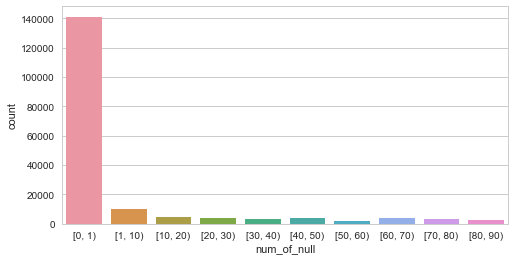

In [173]:
cut = pd.cut(num_data['num_of_null'], bins = bins, include_lowest = True, right = False) # pd.cut bins the data
fig, axis1 = plt.subplots(1, figsize = (8, 4))
sns.countplot(x = cut, data = cut.to_frame(), ax = axis1)
sns.plt.show()

In [174]:
cut.to_frame().head()

,num_of_null
0,"[0, 1)"
1,"[1, 10)"
2,"[60, 70)"
3,"[10, 20)"
4,"[0, 1)"


In [175]:
num_of_null_each_month = num_data.drop('num_of_null', axis = 1).isnull().sum()

In [176]:
num_of_null_each_month[:10]

2009-01    33715
2009-02    31814
2009-03    31473
2009-04    31039
2009-05    30110
2009-06    29218
2009-07    28724
2009-08    28396
2009-09    27914
2009-10    27456
dtype: int64

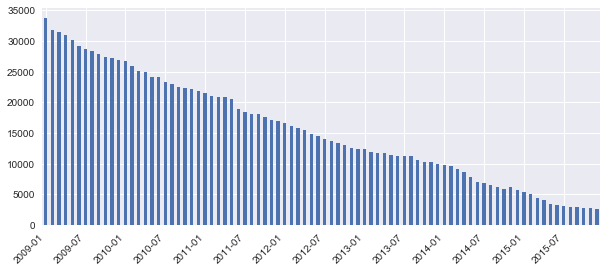

In [177]:
sns.set_style('darkgrid')
plt.figure(figsize = (10, 4))

# pbar represents number of nulls in each column
pbar = num_of_null_each_month.plot.bar()

# first param of xticks is the position of the tick marks
# second param is the actual labels to be displayed at those positions
plt.xticks(list(range(0,len(num_of_null_each_month.index),6)), list(num_of_null_each_month.index[0::6]), rotation=45, ha='right')
plt.show()

Columns with missing values decrease over time. 

### Data Imputation

In [183]:
# Below method returns the index of the column (i'e one of 0-83) 
# where the first non-NA number appeared in the row. 
# If all are NAN values then, 84 is returned
def FirstNonNull(row):
    count=0
    for col in row:
        if col==False: return count # check if a value exists in the cell. return 
        else: count = count+1
    return count


# Below method returns the index of the column (i'e one of 0-83) 
# where the last non-NA number appeared in the row. 
# If there are no NAN values then, then -1 is returned
def LastNonNull(row):
    count=0
    flag=-1
    for col in row:
        if col==False:  # check if a value exists in the cell. stored cell number where NAN occured.
            flag=count  # Return the last cell where NAN occured. 
            count=count+1
        else: count=count+1
    return flag

In [184]:
def Setzero(x):
    if x < 0:
        return 0
    else:
        return x

In [185]:
## Number of NaN values before service period
Total_data = df.iloc[:,0:5]
Total_data = pd.concat([Total_data, num_data], axis=1)

Total_data['FirstNonNull'] = num_data.copy().drop(['num_of_null'], axis=1).isnull().apply(FirstNonNull,axis=1)
Total_data['LastNonNull'] = num_data.copy().drop(['num_of_null'],axis=1).isnull().apply(LastNonNull,axis=1)

Total_data['NullInService'] = Total_data.num_of_null - Total_data.FirstNonNull - (len(num_data.columns)-1-Total_data.LastNonNull) +1    
Total_data['NullInService'] = Total_data['NullInService'].apply(Setzero)

Total_data.NullInService.value_counts(sort=False).head(6) ## Print only head values

0    173773
1      3894
2       489
3       197
4        80
5        45
Name: NullInService, dtype: int64

In [192]:
long_data = Total_data[Total_data['num_of_null'] == 0]
print(len(long_data))

141205


In [193]:
short_data = Total_data[(Total_data['num_of_null'] > 0) & (Total_data['NullInService'] == 0)]
print(len(short_data))

32568


In [195]:
interrupted_data = Total_data[(Total_data['NullInService']) > 0]
print(len(interrupted_data))

4824


In [196]:
null_data = Total_data[(Total_data['num_of_null'] > 0) & (Total_data['NullInService'] >= 0)]
print(len(null_data))

37392


### Basic Imputation Methods

In [199]:
num_score = int(np.floor(0.01 * len(num_data['num_of_null'] == 0)))
print(num_score)

1785


In [200]:
rng = np.random.RandomState()
col = rng.randint(0, 84, num_score)

In [201]:
# Mean Imputer
num_data_mean = num_data.copy()
imp_mean = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 1, copy = False)
imp_mean.fit_transform(num_data_mean)

array([[  2.00000000e+01,   2.00000000e+01,   2.00000000e+01, ...,
          2.20000000e+01,   2.10000000e+01,   0.00000000e+00],
       [  2.48809524e+01,   3.00000000e+01,   3.00000000e+01, ...,
          1.70000000e+01,   1.10000000e+01,   1.00000000e+00],
       [  1.22173913e+01,   1.22173913e+01,   1.22173913e+01, ...,
          6.00000000e+00,   3.00000000e+00,   6.20000000e+01],
       ..., 
       [  2.57400000e+03,   1.68500000e+03,   1.14100000e+03, ...,
          4.75600000e+03,   4.43500000e+03,   0.00000000e+00],
       [  2.57400000e+03,   1.68500000e+03,   1.14100000e+03, ...,
          4.75600000e+03,   4.43500000e+03,   0.00000000e+00],
       [  2.57400000e+03,   1.68500000e+03,   1.14100000e+03, ...,
          4.75600000e+03,   4.43500000e+03,   0.00000000e+00]])

In [202]:
# Median Imputer
num_data_median = num_data.copy()
imp_median = Imputer(missing_values = 'NaN', strategy = 'median', axis = 1, copy = False)
imp_median.fit_transform(num_data_median)

array([[  2.00000000e+01,   2.00000000e+01,   2.00000000e+01, ...,
          2.20000000e+01,   2.10000000e+01,   0.00000000e+00],
       [  3.00000000e+01,   3.00000000e+01,   3.00000000e+01, ...,
          1.70000000e+01,   1.10000000e+01,   1.00000000e+00],
       [  9.00000000e+00,   9.00000000e+00,   9.00000000e+00, ...,
          6.00000000e+00,   3.00000000e+00,   6.20000000e+01],
       ..., 
       [  2.57400000e+03,   1.68500000e+03,   1.14100000e+03, ...,
          4.75600000e+03,   4.43500000e+03,   0.00000000e+00],
       [  2.57400000e+03,   1.68500000e+03,   1.14100000e+03, ...,
          4.75600000e+03,   4.43500000e+03,   0.00000000e+00],
       [  2.57400000e+03,   1.68500000e+03,   1.14100000e+03, ...,
          4.75600000e+03,   4.43500000e+03,   0.00000000e+00]])

In [204]:
num_data_mfreq = num_data.copy()
imp_mfreq = Imputer(missing_values = 'NaN', strategy = 'most_frequent', axis = 1, copy = False)
imp_mfreq.fit_transform(num_data_mfreq)

array([[  2.00000000e+01,   2.00000000e+01,   2.00000000e+01, ...,
          2.20000000e+01,   2.10000000e+01,   0.00000000e+00],
       [  3.00000000e+01,   3.00000000e+01,   3.00000000e+01, ...,
          1.70000000e+01,   1.10000000e+01,   1.00000000e+00],
       [  9.00000000e+00,   9.00000000e+00,   9.00000000e+00, ...,
          6.00000000e+00,   3.00000000e+00,   6.20000000e+01],
       ..., 
       [  2.57400000e+03,   1.68500000e+03,   1.14100000e+03, ...,
          4.75600000e+03,   4.43500000e+03,   0.00000000e+00],
       [  2.57400000e+03,   1.68500000e+03,   1.14100000e+03, ...,
          4.75600000e+03,   4.43500000e+03,   0.00000000e+00],
       [  2.57400000e+03,   1.68500000e+03,   1.14100000e+03, ...,
          4.75600000e+03,   4.43500000e+03,   0.00000000e+00]])

In [205]:
## NaN values at head can't be filled with ffill so complement with bfill
num_data_ffill = num_data.copy()
imp_ffill = num_data_ffill.fillna(method = 'ffill', axis = 1).fillna(method = 'bfill', axis = 1)
imp_ffill

,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,...,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,num_of_null
0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,1.0,2.0,1.0,7.0,7.0,42.0,27.0,22.0,21.0,0.0
1,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,...,13.0,16.0,14.0,15.0,16.0,13.0,17.0,17.0,11.0,1.0
2,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,9.0,7.0,8.0,8.0,10.0,12.0,9.0,6.0,3.0,62.0
3,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,...,20.0,16.0,16.0,18.0,18.0,17.0,17.0,18.0,9.0,18.0
4,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,27.0,27.0,28.0,28.0,31.0,27.0,27.0,27.0,24.0,0.0
5,20.0,20.0,20.0,20.0,20.0,20.0,20.0,17.0,14.0,10.0,...,19.0,18.0,18.0,19.0,19.0,19.0,18.0,18.0,24.0,0.0
6,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,24.0,0.0
7,30.0,10.0,30.0,20.0,30.0,30.0,30.0,30.0,30.0,30.0,...,15.0,26.0,27.0,29.0,22.0,27.0,26.0,33.0,32.0,0.0
8,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,7.0,7.0,8.0,5.0,7.0,16.0,7.0,7.0,4.0,0.0
9,19.0,21.0,21.0,22.0,26.0,20.0,23.0,21.0,18.0,10.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,24.0,0.0


In [206]:
## NaN values at tail can't be filled with bfill so complement with ffill.
num_data_bfill = num_data.copy()
imp_bfill = num_data_bfill.fillna(method='bfill', axis=1).fillna(method='ffill', axis=1)
imp_bfill

,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,...,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,num_of_null
0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,1.0,2.0,1.0,7.0,7.0,42.0,27.0,22.0,21.0,0.0
1,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,...,13.0,16.0,14.0,15.0,16.0,13.0,17.0,17.0,11.0,1.0
2,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,9.0,7.0,8.0,8.0,10.0,12.0,9.0,6.0,3.0,62.0
3,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,...,20.0,16.0,16.0,18.0,18.0,17.0,17.0,18.0,9.0,18.0
4,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,27.0,27.0,28.0,28.0,31.0,27.0,27.0,27.0,24.0,0.0
5,20.0,20.0,20.0,20.0,20.0,20.0,20.0,17.0,14.0,10.0,...,19.0,18.0,18.0,19.0,19.0,19.0,18.0,18.0,24.0,0.0
6,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,24.0,0.0
7,30.0,10.0,30.0,20.0,30.0,30.0,30.0,30.0,30.0,30.0,...,15.0,26.0,27.0,29.0,22.0,27.0,26.0,33.0,32.0,0.0
8,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,7.0,7.0,8.0,5.0,7.0,16.0,7.0,7.0,4.0,0.0
9,19.0,21.0,21.0,22.0,26.0,20.0,23.0,21.0,18.0,10.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,24.0,0.0
